In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns

In [2]:
train_data = pd.read_excel("training data.xlsx")

In [3]:
X_data = train_data[["Government Integrity", "Tax Burden", "Gov't Spending", "Business Freedom", "Monetary Freedom", "Trade Freedom", "Investment Freedom ", "Financial Freedom", "Sound money", "Size of Government","Legal System & Property Rights"]]
y_data = train_data["percentages"]

In [4]:
rest_data = pd.read_excel("rest data - constructing index.xlsx")
X_rest = rest_data[["Government Integrity", "Tax Burden", "Gov't Spending", "Business Freedom", "Monetary Freedom", "Trade Freedom", "Investment Freedom ", "Financial Freedom", "Sound money", "Size of Government","Legal System & Property Rights"]]

In [14]:
summary = rest_data.describe()
summary.to_excel("summary_new.xlsx")

In [11]:
rest_data.describe()

,Index Year,Government Integrity,Tax Burden,Gov't Spending,Business Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Size of Government,Sound money,Legal System & Property Rights,percentages
count,1905.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1905.000000,1905.000000,1905.000000,1905.0
mean,2008.322835,45.265158,72.407737,63.401842,66.609421,76.635316,72.907105,56.494737,53.900000,6.414884,8.087267,5.478111,0.0
std,5.091622,23.577357,13.764370,23.138228,15.842401,10.111267,13.252877,20.116890,18.690701,1.079722,1.470041,1.685073,0.0
min,2000.000000,0.000000,29.800000,0.000000,23.400000,0.000000,0.000000,0.000000,10.000000,3.200157,0.000000,1.544514,0.0
25%,2004.000000,28.000000,64.375000,48.100000,55.000000,73.075000,64.750000,48.750000,40.000000,5.694805,7.012504,4.207439,0.0
50%,2008.000000,37.000000,73.800000,68.500000,69.150000,78.200000,75.800000,55.000000,50.000000,6.456205,8.298407,5.338032,0.0
75%,2013.000000,63.000000,81.500000,82.300000,77.425000,82.700000,82.800000,70.000000,70.000000,7.162738,9.411558,6.584082,0.0
max,2017.000000,100.000000,99.900000,97.600000,100.000000,95.400000,95.000000,95.000000,90.000000,9.082652,9.922187,9.138119,0.0


In [5]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_data, y_data, test_size=0.25, random_state=18)

In [6]:
# Try SVR model with different kernel
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.05, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma= "auto")
svr_poly = SVR(kernel='poly', C=100, gamma= "auto" , degree=3, epsilon=.1,
               coef0=1)

reg_rbf = svr_rbf.fit(X_train, y_train)
reg_lin = svr_lin.fit(X_train, y_train)
reg_poly = svr_poly.fit(X_train, y_train)

In [7]:
y_pred_rbf = reg_rbf.predict(X_test)
pred_wrong_rbf = abs(y_pred_rbf - y_test)
MSE_rbf = pred_wrong_rbf.mean()
print('The MSE of SVR model with rbf kernel for test set is', MSE_rbf)

The MSE of SVR model with rbf kernel for test set is 2.992300799282422


In [8]:
y_pred_lin = reg_lin.predict(X_test)
pred_wrong_lin = abs(y_pred_lin - y_test)
MSE_lin = pred_wrong_lin.mean()
print('The MSE of SVR model with linear kernel for test set is', MSE_lin)

The MSE of SVR model with linear kernel for test set is 0.9754688972063046


In [9]:
y_pred_poly = reg_poly.predict(X_test)
pred_wrong_poly = abs(y_pred_poly - y_test)
MSE_poly = pred_wrong_poly.mean()
print('The MSE of SVR model with polynomial kernel for test set is', MSE_poly)

The MSE of SVR model with polynomial kernel for test set is 1.1602932241246238


In [10]:
svr_lin2 = SVR(kernel='linear', C=1, gamma= 0.05)
reg_lin2 = svr_lin.fit(X_train, y_train)
y_pred_lin2 = reg_lin2.predict(X_test)
pred_wrong_lin2 = abs(y_pred_lin - y_test)
MSE_lin2 = pred_wrong_lin2.mean()
print('The MSE of SVR model with linear kernel for test set is', MSE_lin2)

The MSE of SVR model with linear kernel for test set is 0.9754688972063046


In [11]:
# Try Random Forest model, and the results are discrete.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)
reg_rf = clf.fit(X_train, y_train)
y_prec_rf = reg_rf.predict(X_test)
pred_wrong_rf = abs(y_prec_rf - y_test)
MSE_rf = pred_wrong_rf.mean()
print('The MSE of Random Forest model for test set is', MSE_rf)

The MSE of Random Forest model for test set is 1.0769230769230769


/Users/zhouanqi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
#Try Neural Network model (discrete results)
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(solver='lbfgs', random_state=1)
reg_nn = clf_nn.fit(X_train, y_train)
y_prec_nn = reg_nn.predict(X_test)
pred_wrong_nn = abs(y_prec_nn - y_test)
MSE_nn = pred_wrong_nn.mean()
print('The MSE of Neural Network model for test set is', MSE_nn)

The MSE of Neural Network model for test set is 1.3076923076923077


In [13]:
#Try Desicion Tree model (discrete results)
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier()
reg_dt = clf_dt.fit(X_train, y_train)
y_prec_dt = reg_dt.predict(X_test)
pred_wrong_dt = abs(y_prec_dt - y_test)
MSE_dt = pred_wrong_dt.mean()
print('The MSE of Desicion Tree model for test set is', MSE_dt)

The MSE of Desicion Tree model for test set is 0.9230769230769231


In [14]:
rest_data.dropna(axis=0, how='any', inplace=True)

In [37]:
# so we choose SVR model with linear kernel to predict the rest of data.
X_rest = rest_data[["Government Integrity", "Tax Burden", "Gov't Spending", "Business Freedom", "Monetary Freedom", "Trade Freedom", "Investment Freedom ", "Financial Freedom", "Sound money", "Size of Government","Legal System & Property Rights"]]
rest_data["percentages"] = reg_lin.predict(X_rest)

In [16]:
rest_data.shape

(1900, 14)

No handles with labels found to put in legend.


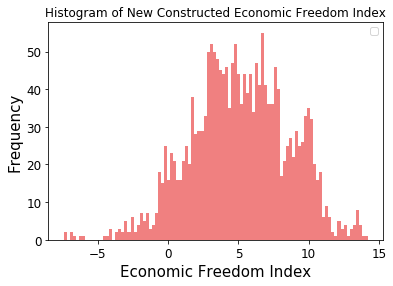

In [52]:
plt.figure()
rest_data['percentages'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12, color = "lightcoral")
plt.xlabel("Economic Freedom Index", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Histogram of New Constructed Economic Freedom Index")
plt.legend()
plt.show()

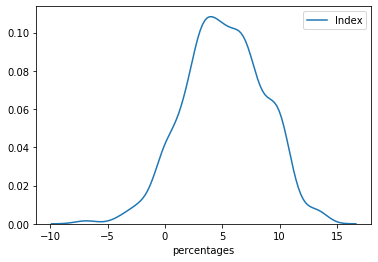

In [46]:
sns.distplot(rest_data['percentages'], hist = False, label='Index')

In [17]:
rest_data.to_excel("prediction_output.xlsx")

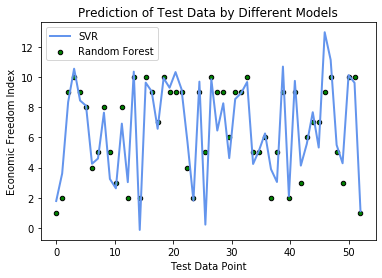

In [18]:
#X = np.linspace(0, 1900, num=1900)
X = np.linspace(0, 52, num = 52)
# Plot the results
plt.figure()
plt.scatter(X, reg_rf.predict(X_data), s=20, edgecolor="black",
            c="green", label="Random Forest")
plt.plot(X, reg_lin.predict(X_data), color="cornflowerblue",
         label="SVR", linewidth=2)

plt.xlabel("Test Data Point")
plt.ylabel("Economic Freedom Index")
plt.title("Prediction of Test Data by Different Models")
plt.legend()
plt.show()

In [ ]:
X = np.linspace(0, 52, num = 52)
# Plot the results
plt.figure()
plt.plot(X, reg_lin.predict(X_data), color="cornflowerblue",
         label="SVR", linewidth=2)
plt.scatter(X, reg_dt.predict(X_data), s=20, edgecolor="black",
            c="yellow", label="Decision Tree")
plt.scatter(X, reg_nn.predict(X_data), s=20, edgecolor="black",
            c="red", label="Decision Tree")

plt.xlabel("Test Data Point")
plt.ylabel("Economic Freedom Index")
plt.title("Prediction of Test Data by Different Models")
plt.legend()
plt.show()

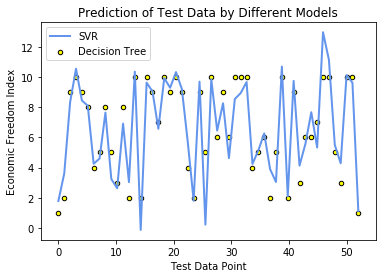

In [23]:
X = np.linspace(0, 52, num = 52)
# Plot the results
plt.figure()
plt.plot(X, reg_lin.predict(X_data), color="cornflowerblue",
         label="SVR", linewidth=2)
plt.scatter(X, reg_dt.predict(X_data), s=20, edgecolor="black",
            c="yellow", label="Decision Tree")

plt.xlabel("Test Data Point")
plt.ylabel("Economic Freedom Index")
plt.title("Prediction of Test Data by Different Models")
plt.legend()
plt.show()

In [ ]:
plt.scatter(X, reg_nn.predict(X_data), s=20, edgecolor="black",
            c="red", label="Decision Tree")

In [ ]:
plt.scatter(X, reg_dt.predict(X_data), s=20,
            c="green", label="Neural Network")

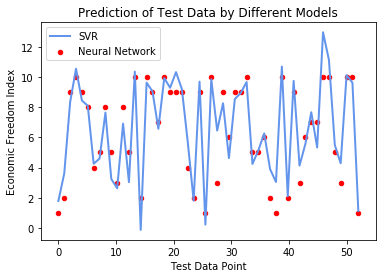

In [28]:
X = np.linspace(0, 52, num = 52)
# Plot the results
plt.figure()
plt.plot(X, reg_lin.predict(X_data), color="cornflowerblue",
         label="SVR", linewidth=2)
plt.scatter(X, reg_nn.predict(X_data), s=20,
            c="red", label="Neural Network")

plt.xlabel("Test Data Point")
plt.ylabel("Economic Freedom Index")
plt.title("Prediction of Test Data by Different Models")
plt.legend()
plt.show()

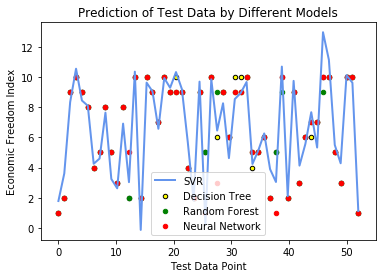

In [26]:
X = np.linspace(0, 52, num = 52)
# Plot the results
plt.figure()
plt.plot(X, reg_lin.predict(X_data), color="cornflowerblue",
         label="SVR", linewidth=2)
plt.scatter(X, reg_dt.predict(X_data), s=20, edgecolor="black",
            c="yellow", label="Decision Tree")
plt.scatter(X, reg_rf.predict(X_data), s=20, 
            c="green", label="Random Forest")
plt.scatter(X, reg_nn.predict(X_data), s=20,
            c="red", label="Neural Network")

plt.xlabel("Test Data Point")
plt.ylabel("Economic Freedom Index")
plt.title("Prediction of Test Data by Different Models")
plt.legend()
plt.show()

In [15]:
main_model_data = pd.read_excel("main model data.xlsx")

In [18]:
summary = main_model_data.describe()
summary.to_excel("summary_new_main.xlsx")